In [1]:
import pandas as pd  

# Sample data  
data = {  
    'Company': ['OneFi', 'Paystack', 'Cowrywise', 'PiggyVest', 'Kudi', 'Wallets Africa', 'TeamApt', 'Flutterwave', 'FairMoney', 'Migo'],  
    'Project_Management': ['Agile', 'Scrum', 'Kanban', 'Waterfall', 'Agile', 'Scrum', 'Waterfall', 'Agile', 'Kanban', 'Scrum'],  
    'Estimated_Cost': [5000000, 8000000, 3000000, 1000000, 500000, 100000, 5000000, 35000000, 11000000, 20000000],  
    'Scheduled': [6, 3, 2, 4, 3, 2, 6, 3, 3, 3],  
    'Quality': ['High', 'Medium', 'High', 'High', 'High', 'Medium', 'High', 'High', 'Medium', 'High']  
}  

df = pd.DataFrame(data)  

# Group by Project Management Methodology  
summary = df.groupby('Project_Management').agg({  
    'Estimated_Cost': ['mean', 'sum'],  
    'Scheduled': ['mean', 'count'],  
    'Quality': lambda x: x.value_counts().idxmax()  # Most common quality  
}).reset_index()  

print(summary)  

  Project_Management Estimated_Cost           Scheduled        Quality
                               mean       sum      mean count <lambda>
0              Agile   1.350000e+07  40500000  4.000000     3     High
1             Kanban   7.000000e+06  14000000  2.500000     2     High
2              Scrum   9.366667e+06  28100000  2.666667     3   Medium
3          Waterfall   3.000000e+06   6000000  5.000000     2     High


In [2]:
# Convert categorical data to numerical for correlation analysis  
df['Quality'] = df['Quality'].map({'High': 2, 'Medium': 1, 'Low': 0})  

# Correlation matrix  
correlation = df[['Estimated_Cost', 'Scheduled', 'Quality']].corr()  
print(correlation)  

                Estimated_Cost  Scheduled   Quality
Estimated_Cost        1.000000  -0.115742  0.156684
Scheduled            -0.115742   1.000000  0.401092
Quality               0.156684   0.401092  1.000000


In [3]:
# Define company size categories  
def categorize_size(num_workers):  
    if num_workers < 20:  
        return 'Small'  
    elif num_workers <= 100:  
        return 'Medium'  
    else:  
        return 'Large'  

# Sample number of workers data  
df['Number_of_Workers'] = [150, 200, 50, 100, 20, 10, 50, 200, 100, 20]  
df['Size_Category'] = df['Number_of_Workers'].apply(categorize_size)  

# Group by Size Category  
size_summary = df.groupby('Size_Category').agg({  
    'Project_Management': 'value_counts'  
}).unstack().fillna(0)  

print(size_summary)  

                   Project_Management                       
Project_Management              Agile Kanban Scrum Waterfall
Size_Category                                               
Large                             2.0    0.0   1.0       0.0
Medium                            1.0    2.0   1.0       2.0
Small                             0.0    0.0   1.0       0.0


In [4]:
# Sample project types  
df['Project'] = ['Digital Lending Platform', 'Payment Gateway', 'Micro-Investing App', 'Savings and Investment App',   
                 'Chatbot-based Banking', 'Digital Wallet', 'Digital Banking Platform', 'Payment Gateway',   
                 'Digital Lending Platform', 'Digital Lending Platform']  

# Cross-tabulation  
crosstab = pd.crosstab(df['Project'], df['Project_Management'])  
print(crosstab)  

Project_Management          Agile  Kanban  Scrum  Waterfall
Project                                                    
Chatbot-based Banking           1       0      0          0
Digital Banking Platform        0       0      0          1
Digital Lending Platform        1       1      1          0
Digital Wallet                  0       0      1          0
Micro-Investing App             0       1      0          0
Payment Gateway                 1       0      1          0
Savings and Investment App      0       0      0          1


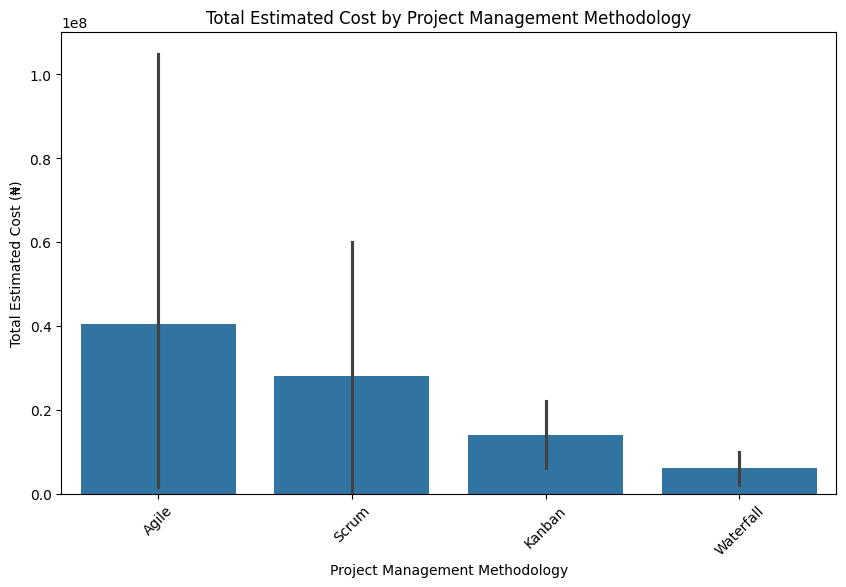

In [5]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Sample data  
data = {  
    'Company': ['OneFi', 'Paystack', 'Cowrywise', 'PiggyVest', 'Kudi', 'Wallets Africa', 'TeamApt', 'Flutterwave', 'FairMoney', 'Migo'],  
    'Project_Management': ['Agile', 'Scrum', 'Kanban', 'Waterfall', 'Agile', 'Scrum', 'Waterfall', 'Agile', 'Kanban', 'Scrum'],  
    'Estimated_Cost': [5000000, 8000000, 3000000, 1000000, 500000, 100000, 5000000, 35000000, 11000000, 20000000],  
}  

df = pd.DataFrame(data)  

# Bar plot  
plt.figure(figsize=(10, 6))  
sns.barplot(x='Project_Management', y='Estimated_Cost', data=df, estimator=sum)  
plt.title('Total Estimated Cost by Project Management Methodology')  
plt.xlabel('Project Management Methodology')  
plt.ylabel('Total Estimated Cost (₦)')  
plt.xticks(rotation=45)  
plt.show()  

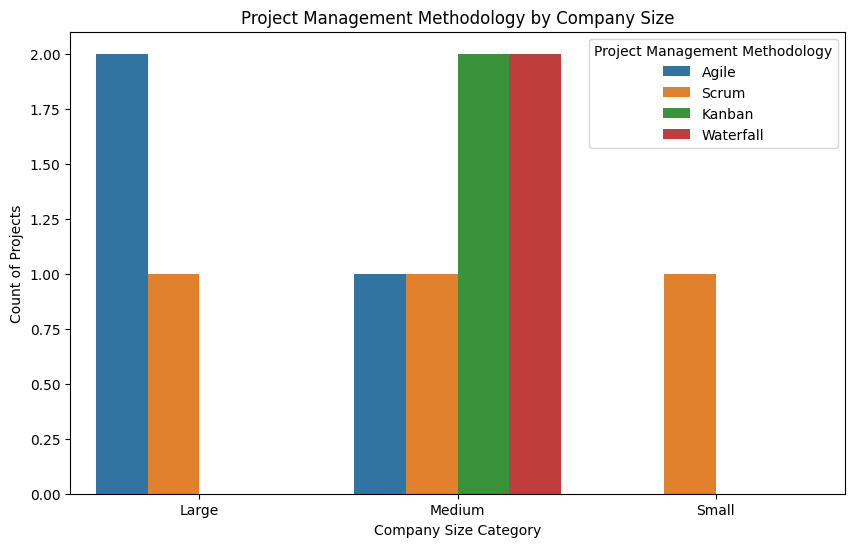

In [8]:
# Define company size categories  
def categorize_size(num_workers):  
    if num_workers < 20:  
        return 'Small'  
    elif num_workers <= 100:  
        return 'Medium'  
    else:  
        return 'Large'  

# Sample number of workers data  
df['Number_of_Workers'] = [150, 200, 50, 100, 20, 10, 50, 200, 100, 20]  
df['Size_Category'] = df['Number_of_Workers'].apply(categorize_size)  

# Count plot  
plt.figure(figsize=(10, 6))  
sns.countplot(x='Size_Category', hue='Project_Management', data=df)  
plt.title('Project Management Methodology by Company Size')  
plt.xlabel('Company Size Category')  
plt.ylabel('Count of Projects')  
plt.legend(title='Project Management Methodology')  
plt.show()  

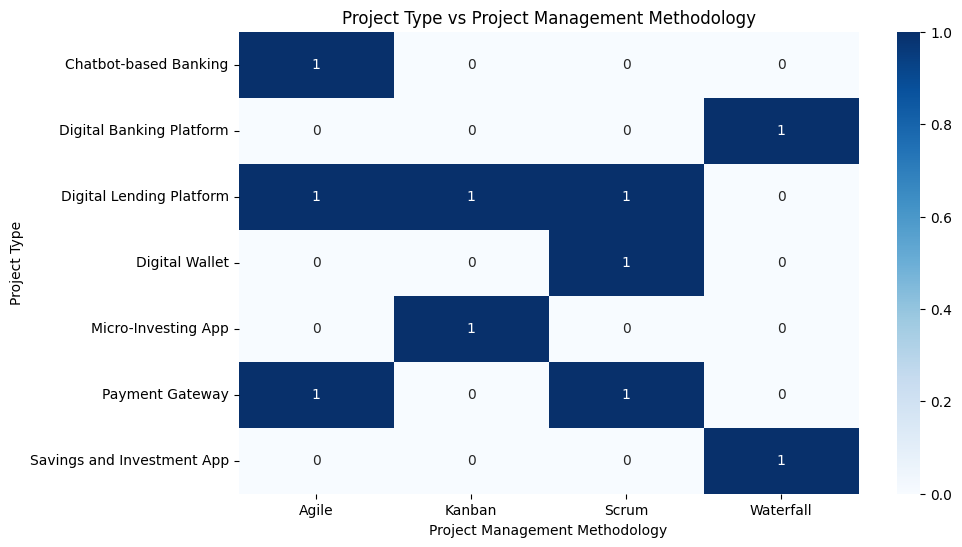

In [7]:
# Sample project types  
df['Project'] = ['Digital Lending Platform', 'Payment Gateway', 'Micro-Investing App', 'Savings and Investment App',   
                 'Chatbot-based Banking', 'Digital Wallet', 'Digital Banking Platform', 'Payment Gateway',   
                 'Digital Lending Platform', 'Digital Lending Platform']  

# Cross-tabulation  
crosstab = pd.crosstab(df['Project'], df['Project_Management'])  

# Heatmap  
plt.figure(figsize=(10, 6))  
sns.heatmap(crosstab, annot=True, cmap='Blues')  
plt.title('Project Type vs Project Management Methodology')  
plt.xlabel('Project Management Methodology')  
plt.ylabel('Project Type')  
plt.show()  